In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Flight_price.csv')

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df['Route'].value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? VNS ? DEL ? HYD             1
BOM ? JDH ? JAI ? DEL ? HYD       1
BLR ? HBX ? BOM ? NAG ? DEL       1
BOM ? CCU ? HYD                   1
BOM ? COK ? MAA ? HYD             1
Name: Route, Length: 128, dtype: int64

In [6]:
df['Total_Stops'].fillna(1,inplace=True)

In [7]:
df['Route'].fillna('DEL ? BOM ? COK',inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
k=df['Date_of_Journey'][1]

In [14]:
k[-7:-5]

'05'

In [15]:
year=[]
month=[]
for i in df['Date_of_Journey']:
    year.append(int(i[-4:]))
    month.append(int(i[-7:-5]))

In [16]:
df.shape

(10683, 11)

In [17]:
len(month)

10683

In [18]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
df['month']=month
df['year']=year

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019


In [21]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [22]:
df1=df.copy()

In [23]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019


In [24]:
df1.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
1              1
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
df1['Total_Stops'].replace(['non-stop','2 stops','3 stops','4 stops'],[0,2,3,4],inplace=True)

In [27]:
df1['Total_Stops'].value_counts()

1 stop    5625
0         3491
2         1520
3           45
1            1
4            1
Name: Total_Stops, dtype: int64

In [28]:
df1['Total_Stops'].replace(['1 stop',1],1,inplace=True)

In [29]:
df1['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [30]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,0,No info,3897,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2,No info,7662,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2,No info,13882,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1,No info,6218,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1,No info,13302,3,2019


In [31]:
df2=df1.drop(['Dep_Time','Duration'],axis=1)

In [32]:
df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0,No info,3897,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2,No info,7662,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2,No info,13882,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1,No info,6218,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1,No info,13302,3,2019


In [33]:
df3=pd.get_dummies(df2)

In [34]:
df3.head()

,Total_Stops,Price,month,year,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR ? AMD ? DEL,Route_BLR ? BBI ? DEL,Route_BLR ? BDQ ? DEL,Route_BLR ? BOM ? AMD ? DEL,Route_BLR ? BOM ? BHO ? DEL,Route_BLR ? BOM ? DEL,Route_BLR ? BOM ? IDR ? DEL,Route_BLR ? BOM ? IDR ? GWL ? DEL,Route_BLR ? BOM ? IXC ? DEL,Route_BLR ? BOM ? JDH ? DEL,Route_BLR ? BOM ? NAG ? DEL,Route_BLR ? BOM ? UDR ? DEL,Route_BLR ? CCU ? BBI ? DEL,Route_BLR ? CCU ? BBI ? HYD ? DEL,Route_BLR ? CCU ? BBI ? HYD ? VGA ? DEL,Route_BLR ? CCU ? DEL,Route_BLR ? CCU ? GAU ? DEL,Route_BLR ? COK ? DEL,Route_BLR ? DEL,Route_BLR ? GAU ? DEL,Route_BLR ? GOI ? DEL,Route_BLR ? HBX ? BOM ? AMD ? DEL,Route_BLR ? HBX ? BOM ? BHO ? DEL,Route_BLR ? HBX ? BOM ? NAG ? DEL,Route_BLR ? HYD ? DEL,Route_BLR ? HYD ? VGA ? DEL,Route_BLR ? IDR ? DEL,Route_BLR ? LKO ? DEL,Route_BLR ? MAA ? DEL,Route_BLR ? NAG ? DEL,Route_BLR ? PNQ ? DEL,Route_BLR ? STV ? DEL,Route_BLR ? TRV ? COK ? DEL,Route_BLR ? VGA ? DEL,Route_BLR ? VGA ? HYD ? DEL,Route_BLR ? VGA ? VTZ ? DEL,Route_BOM ? AMD ? ISK ? HYD,Route_BOM ? BBI ? HYD,Route_BOM ? BDQ ? DEL ? HYD,Route_BOM ? BHO ? DEL ? HYD,Route_BOM ? BLR ? CCU ? BBI ? HYD,Route_BOM ? BLR ? HYD,Route_BOM ? CCU ? HYD,Route_BOM ? COK ? MAA ? HYD,Route_BOM ? DED ? DEL ? HYD,Route_BOM ? DEL ? HYD,Route_BOM ? GOI ? HYD,Route_BOM ? GOI ? PNQ ? HYD,Route_BOM ? HYD,Route_BOM ? IDR ? DEL ? HYD,Route_BOM ? JAI ? DEL ? HYD,Route_BOM ? JDH ? DEL ? HYD,Route_BOM ? JDH ? JAI ? DEL ? HYD,Route_BOM ? JLR ? HYD,Route_BOM ? MAA ? HYD,Route_BOM ? NDC ? HYD,Route_BOM ? RPR ? VTZ ? HYD,Route_BOM ? UDR ? DEL ? HYD,Route_BOM ? VNS ? DEL ? HYD,Route_CCU ? AMD ? BLR,Route_CCU ? BBI ? BLR,Route_CCU ? BBI ? BOM ? BLR,Route_CCU ? BBI ? HYD ? BLR,Route_CCU ? BBI ? IXR ? DEL ? BLR,Route_CCU ? BLR,Route_CCU ? BOM ? AMD ? BLR,Route_CCU ? BOM ? BLR,Route_CCU ? BOM ? COK ? BLR,Route_CCU ? BOM ? GOI ? BLR,Route_CCU ? BOM ? HBX ? BLR,Route_CCU ? BOM ? PNQ ? BLR,Route_CCU ? BOM ? TRV ? BLR,Route_CCU ? DEL ? AMD ? BLR,Route_CCU ? DEL ? BLR,Route_CCU ? DEL ? COK ? BLR,Route_CCU ? DEL ? COK ? TRV ? BLR,Route_CCU ? DEL ? VGA ? BLR,Route_CCU ? GAU ? BLR,Route_CCU ? GAU ? DEL ? BLR,Route_CCU ? GAU ? IMF ? DEL ? BLR,Route_CCU ? HYD ? BLR,Route_CCU ? IXA ? BLR,Route_CCU ? IXB ? BLR,Route_CCU ? IXB ? DEL ? BLR,Route_CCU ? IXR ? BBI ? BLR,Route_CCU ? IXR ? DEL ? BLR,Route_CCU ? IXZ ? MAA ? BLR,Route_CCU ? JAI ? BOM ? BLR,Route_CCU ? JAI ? DEL ? BLR,Route_CCU ? KNU ? BLR,Route_CCU ? MAA ? BLR,Route_CCU ? NAG ? BLR,Route_CCU ? PAT ? BLR,Route_CCU ? PNQ ? BLR,Route_CCU ? RPR ? HYD ? BLR,Route_CCU ? VNS ? DEL ? BLR,Route_CCU ? VTZ ? BLR,Route_DEL ? AMD ? BOM ? COK,Route_DEL ? AMD ? COK,Route_DEL ? ATQ ? BOM ? COK,Route_DEL ? BBI ? COK,Route_DEL ? BDQ ? BOM ? COK,Route_DEL ? BHO ? BOM ? COK,Route_DEL ? BLR ? COK,Route_DEL ? BOM ? COK,Route_DEL ? CCU ? BOM ? COK,Route_DEL ? COK,Route_DEL ? DED ? BOM ? COK,Route_DEL ? GOI ? BOM ? COK,Route_DEL ? GWL ? IDR ? BOM ? COK,Route_DEL ? HYD ? BOM ? COK,Route_DEL ? HYD ? COK,Route_DEL ? HYD ? MAA ? COK,Route_DEL ? IDR ? BOM ? COK,Route_DEL ? IXC ? BOM ? COK,Route_DEL ? IXU ? BOM ? COK,Route_DEL ? JAI ? BOM ? COK,Route_DEL ? JDH ? BOM ? COK,Route_DEL ? LKO ? BOM ? COK,Route_DEL ? LKO ? COK,Route_DEL ? MAA ? BOM ? COK,Route_DEL ? MAA ? COK,Route_DEL ? NAG ? BOM ? COK,Route_DEL ? PNQ ? COK,Route_DEL ? RPR ? NAG ? BOM ? COK,Route_DEL ? TRV ? COK,Route_DEL ? UDR ? BOM ? COK,Route_MAA ? CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal 

In [35]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,month,year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,0,No info,3897,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2,No info,7662,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2,No info,13882,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1,No info,6218,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1,No info,13302,3,2019


In [36]:
departure_time=[]
for i in df1['Dep_Time']:
    k=i.split(':')
    k1=int(k[0])
    k2=int(k[1])
    departure_time.append(k1+(k2/60))

In [37]:
departure_time1=[]
for i in departure_time:
    departure_time1.append(round(i,2))

In [38]:
df3['Departure_time']=departure_time1

In [39]:
k=df1['Duration'][1]

In [40]:
k

'7h 25m'

In [41]:
k1=k.split(' ')

In [42]:
len(k1)

2

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
df3['Duration']=le.fit_transform(df1['Duration'])

In [46]:
df3.head()

,Total_Stops,Price,month,year,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR ? AMD ? DEL,Route_BLR ? BBI ? DEL,Route_BLR ? BDQ ? DEL,Route_BLR ? BOM ? AMD ? DEL,Route_BLR ? BOM ? BHO ? DEL,Route_BLR ? BOM ? DEL,Route_BLR ? BOM ? IDR ? DEL,Route_BLR ? BOM ? IDR ? GWL ? DEL,Route_BLR ? BOM ? IXC ? DEL,Route_BLR ? BOM ? JDH ? DEL,Route_BLR ? BOM ? NAG ? DEL,Route_BLR ? BOM ? UDR ? DEL,Route_BLR ? CCU ? BBI ? DEL,Route_BLR ? CCU ? BBI ? HYD ? DEL,Route_BLR ? CCU ? BBI ? HYD ? VGA ? DEL,Route_BLR ? CCU ? DEL,Route_BLR ? CCU ? GAU ? DEL,Route_BLR ? COK ? DEL,Route_BLR ? DEL,Route_BLR ? GAU ? DEL,Route_BLR ? GOI ? DEL,Route_BLR ? HBX ? BOM ? AMD ? DEL,Route_BLR ? HBX ? BOM ? BHO ? DEL,Route_BLR ? HBX ? BOM ? NAG ? DEL,Route_BLR ? HYD ? DEL,Route_BLR ? HYD ? VGA ? DEL,Route_BLR ? IDR ? DEL,Route_BLR ? LKO ? DEL,Route_BLR ? MAA ? DEL,Route_BLR ? NAG ? DEL,Route_BLR ? PNQ ? DEL,Route_BLR ? STV ? DEL,Route_BLR ? TRV ? COK ? DEL,Route_BLR ? VGA ? DEL,Route_BLR ? VGA ? HYD ? DEL,Route_BLR ? VGA ? VTZ ? DEL,Route_BOM ? AMD ? ISK ? HYD,Route_BOM ? BBI ? HYD,Route_BOM ? BDQ ? DEL ? HYD,Route_BOM ? BHO ? DEL ? HYD,Route_BOM ? BLR ? CCU ? BBI ? HYD,Route_BOM ? BLR ? HYD,Route_BOM ? CCU ? HYD,Route_BOM ? COK ? MAA ? HYD,Route_BOM ? DED ? DEL ? HYD,Route_BOM ? DEL ? HYD,Route_BOM ? GOI ? HYD,Route_BOM ? GOI ? PNQ ? HYD,Route_BOM ? HYD,Route_BOM ? IDR ? DEL ? HYD,Route_BOM ? JAI ? DEL ? HYD,Route_BOM ? JDH ? DEL ? HYD,Route_BOM ? JDH ? JAI ? DEL ? HYD,Route_BOM ? JLR ? HYD,Route_BOM ? MAA ? HYD,Route_BOM ? NDC ? HYD,Route_BOM ? RPR ? VTZ ? HYD,Route_BOM ? UDR ? DEL ? HYD,Route_BOM ? VNS ? DEL ? HYD,Route_CCU ? AMD ? BLR,Route_CCU ? BBI ? BLR,Route_CCU ? BBI ? BOM ? BLR,Route_CCU ? BBI ? HYD ? BLR,Route_CCU ? BBI ? IXR ? DEL ? BLR,Route_CCU ? BLR,Route_CCU ? BOM ? AMD ? BLR,Route_CCU ? BOM ? BLR,Route_CCU ? BOM ? COK ? BLR,Route_CCU ? BOM ? GOI ? BLR,Route_CCU ? BOM ? HBX ? BLR,Route_CCU ? BOM ? PNQ ? BLR,Route_CCU ? BOM ? TRV ? BLR,Route_CCU ? DEL ? AMD ? BLR,Route_CCU ? DEL ? BLR,Route_CCU ? DEL ? COK ? BLR,Route_CCU ? DEL ? COK ? TRV ? BLR,Route_CCU ? DEL ? VGA ? BLR,Route_CCU ? GAU ? BLR,Route_CCU ? GAU ? DEL ? BLR,Route_CCU ? GAU ? IMF ? DEL ? BLR,Route_CCU ? HYD ? BLR,Route_CCU ? IXA ? BLR,Route_CCU ? IXB ? BLR,Route_CCU ? IXB ? DEL ? BLR,Route_CCU ? IXR ? BBI ? BLR,Route_CCU ? IXR ? DEL ? BLR,Route_CCU ? IXZ ? MAA ? BLR,Route_CCU ? JAI ? BOM ? BLR,Route_CCU ? JAI ? DEL ? BLR,Route_CCU ? KNU ? BLR,Route_CCU ? MAA ? BLR,Route_CCU ? NAG ? BLR,Route_CCU ? PAT ? BLR,Route_CCU ? PNQ ? BLR,Route_CCU ? RPR ? HYD ? BLR,Route_CCU ? VNS ? DEL ? BLR,Route_CCU ? VTZ ? BLR,Route_DEL ? AMD ? BOM ? COK,Route_DEL ? AMD ? COK,Route_DEL ? ATQ ? BOM ? COK,Route_DEL ? BBI ? COK,Route_DEL ? BDQ ? BOM ? COK,Route_DEL ? BHO ? BOM ? COK,Route_DEL ? BLR ? COK,Route_DEL ? BOM ? COK,Route_DEL ? CCU ? BOM ? COK,Route_DEL ? COK,Route_DEL ? DED ? BOM ? COK,Route_DEL ? GOI ? BOM ? COK,Route_DEL ? GWL ? IDR ? BOM ? COK,Route_DEL ? HYD ? BOM ? COK,Route_DEL ? HYD ? COK,Route_DEL ? HYD ? MAA ? COK,Route_DEL ? IDR ? BOM ? COK,Route_DEL ? IXC ? BOM ? COK,Route_DEL ? IXU ? BOM ? COK,Route_DEL ? JAI ? BOM ? COK,Route_DEL ? JDH ? BOM ? COK,Route_DEL ? LKO ? BOM ? COK,Route_DEL ? LKO ? COK,Route_DEL ? MAA ? BOM ? COK,Route_DEL ? MAA ? COK,Route_DEL ? NAG ? BOM ? COK,Route_DEL ? PNQ ? COK,Route_DEL ? RPR ? NAG ? BOM ? COK,Route_DEL ? TRV ? COK,Route_DEL ? UDR ? BOM ? COK,Route_MAA ? CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal 

In [47]:
x=df3.drop('Price',axis=1)
y=df3['Price']

In [48]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Building the model using Label Encoding

In [49]:
df2_1=pd.DataFrame()
for i in df2.columns:
    if i in ['Total_Stops','Price','month','year']:
        df2_1[i]=df2[i]
    else:
        df2_1[i]=le.fit_transform(df2[i])

In [50]:
df2_1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,year
0,3,0,5,18,0,8,3897,3,2019
1,1,3,0,84,2,8,7662,5,2019
2,4,2,1,118,2,8,13882,6,2019
3,3,3,0,91,1,8,6218,5,2019
4,3,0,5,29,1,8,13302,3,2019


In [55]:
x=df2_1.drop('Price',axis=1)
y=df2_1['Price']

In [56]:
x_scale=st.fit_transform(x)

In [57]:
from sklearn.preprocessing import StandardScaler as st

In [58]:
st = StandardScaler()

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=45)

In [62]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.383
RMSE: 3609.287
mean absolute error: 2544.32


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from heatmap import corrplot

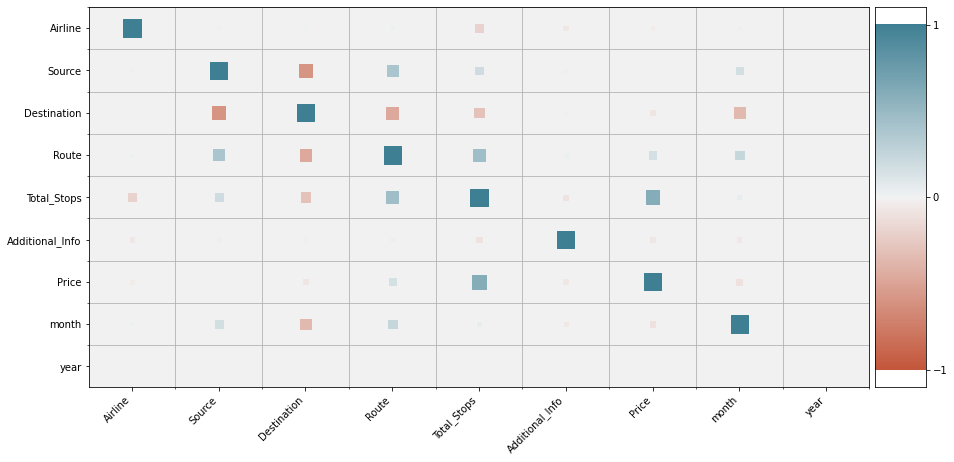

In [65]:
plt.figure(figsize=(15,7))
corrplot(df2_1.corr(),size_scale=300)
plt.show()

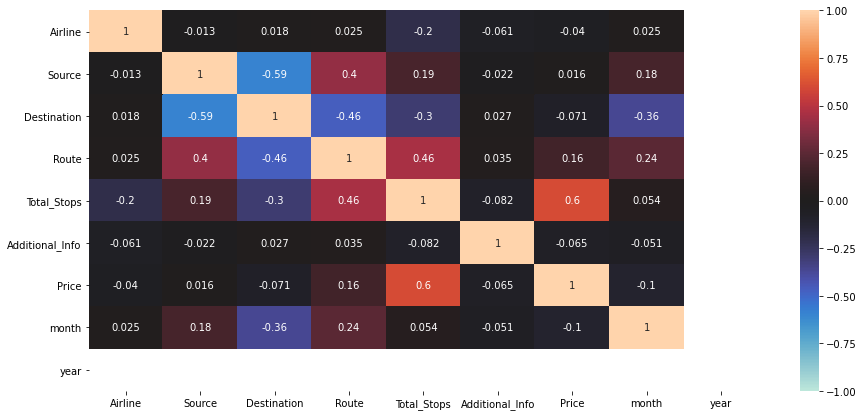

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(df2_1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

# Saving the model

In [69]:
joblib.dump(ln,'linearflight.obj')

['linearflight.obj']

# Reloading the model and predicting 

In [76]:
t=np.array([3,0,5,18,0,8,3,2019])

In [77]:
t=t.reshape(1,8)

In [78]:
ln.predict(t)

array([1244.67937367])